In [6]:
import pandas as pd
import cv2

In [7]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)


In [8]:
csv.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [9]:
csv.describe()

,R,G,B
count,865.000000,865.000000,865.000000
mean,158.598844,124.683237,119.087861
std,85.338432,76.270225,78.343862
min,0.000000,0.000000,0.000000
25%,101.000000,64.000000,53.000000
50%,178.000000,123.000000,119.000000
75%,236.000000,190.000000,186.000000
max,255.000000,255.000000,255.000000


In [10]:
print(csv.shape)

(865, 6)


In [11]:
csv.isnull().values.any()

False

In [12]:
csv.isnull().sum()

color         0
color_name    0
hex           0
R             0
G             0
B             0
dtype: int64

In [13]:
csv.nunique()

color         865
color_name    865
hex           765
R             221
G             234
B             230
dtype: int64

In [14]:
csv.corr()

,R,G,B
R,1.000000,0.226170,0.012736
G,0.226170,1.000000,0.292491
B,0.012736,0.292491,1.000000


In [15]:
img=cv2.imread("dora.jpg",1)

In [16]:
print(img)

[[[235 224 244]
  [234 223 243]
  [234 223 243]
  ...
  [230 214 238]
  [230 214 238]
  [230 214 238]]

 [[235 224 244]
  [234 223 243]
  [234 223 243]
  ...
  [230 214 238]
  [230 214 238]
  [230 214 238]]

 [[235 224 244]
  [234 223 243]
  [234 223 243]
  ...
  [230 214 238]
  [230 214 238]
  [230 214 238]]

 ...

 [[230 214 237]
  [230 214 237]
  [230 214 237]
  ...
  [235 225 242]
  [235 225 242]
  [235 225 242]]

 [[230 214 237]
  [230 214 237]
  [230 214 237]
  ...
  [235 225 242]
  [235 225 242]
  [235 225 242]]

 [[230 214 237]
  [230 214 237]
  [230 214 237]
  ...
  [235 225 242]
  [235 225 242]
  [235 225 242]]]


In [17]:
img=cv2.imread("dora.jpg",0)

In [18]:
print(img)

[[231 230 230 ... 223 223 223]
 [231 230 230 ... 223 223 223]
 [231 230 230 ... 223 223 223]
 ...
 [223 223 223 ... 231 231 231]
 [223 223 223 ... 231 231 231]
 [223 223 223 ... 231 231 231]]


In [19]:
print(type(img))

<class 'numpy.ndarray'>


In [20]:
print(img.shape)


(518, 920)


In [21]:
img=cv2.imread("dora.jpg",1)


In [22]:
print(img.shape)

(518, 920, 3)


In [23]:
img_path =(r'C:\Users\Ilakiya\Desktop\dora.jpg')

In [24]:
image = cv2.imread(img_path)

In [25]:
image = cv2.imread("C:\\Users\\Ilakiya\\Desktop\\dora.jpg")

In [26]:
import matplotlib.pyplot as plt

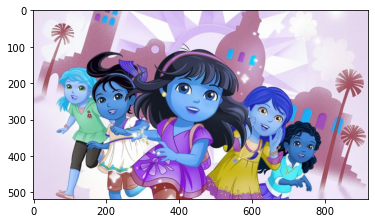

In [27]:
plt.imshow(image)

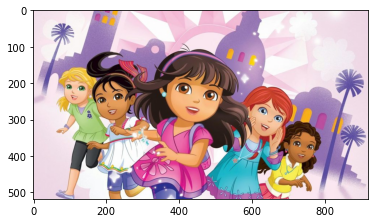

In [28]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

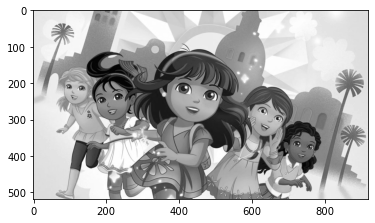

In [29]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

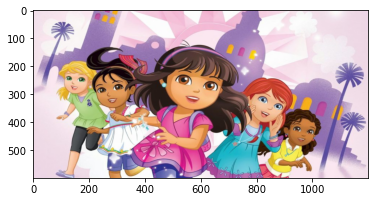

In [30]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [31]:
clicked = False
r = g = b = x_pos = y_pos = 0

In [34]:
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

In [35]:
def draw_function(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

In [36]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

In [ ]:
while True:

    cv2.imshow("image", img)
    if clicked:

        # cv2.rectangle(image, start point, endpoint, color, thickness)-1 fills entire rectangle
        cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), -1)

        # Creating text string to display( Color name and RGB values )
        text = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

        # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

        # For very light colours we will display text in black colour
        if r + g + b >= 600:
            cv2.putText(img, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

        clicked = False

    # Break the loop when user hits 'esc' key
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()